In [ ]:
#@title Tool functions and imports { display-mode: "form" }

import numpy as n
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import scipy.optimize as opt
from scipy.optimize import curve_fit
import pandas as pd
import scipy.signal

import matplotlib.mlab as mlab
from scipy.stats import norm


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

def linear_regression_simple (x_data,y_data):
  """
  (list, list)->(list)
  takes a single data_x, data_y and returns [fit_params, uncertainty_params]
  """
  x = n.array(x_data)
  y = n.array(y_data)
  #Calulating the delta
  sum_xi_square = 0
  sum_xi = 0
  sum_yi = 0
  sum_xi_yi = 0
  for i in range (len(x_data)):
    sum_xi_square += x_data[i]**2
    sum_xi += x_data[i]
    sum_yi += y_data[i]
    sum_xi_yi += x_data[i] * y_data[i]
  delta = len(x_data) * sum_xi_square - (sum_xi)**(2)
  #Now we can determine the parameters
  a = (len(x_data) * sum_xi_yi - sum_xi*sum_yi)/delta
  b = (sum_xi_square * sum_yi - sum_xi * sum_xi_yi) /delta

  #Now we can determine the uncertainty on these parameters

  #Lets start by determining the uncertainty on CU
  var_cu = 0
  for i in range (len(x_data)):
    var_cu += (y_data[i]- a * x_data[i]- b)**2
  var_cu = 1/(len(x_data)-2)

  var_a = var_cu * (len(x_data)/delta)
  var_b = var_cu * (sum_xi_square/delta)

  return [[a, b], [n.sqrt(var_a), n.sqrt(var_b)]]

def linear_regression (measurements):
  """
  (list)->(list)
  Takes a list of measurements [[data_x1, data_y1], [data_x2, data_y2]] and returns the fit and uncertianty for the measurements
  st [[fit1, uncertainty_params1], [fit2, uncertainty_paarams2]]
  """
  #We need to convert the file to an array so that we can use math on it easily
  measurements = n.array(measurements)
  #Lets start by defining the delta for each fit
  """
  for i in range (len(measurements)):
    if len(list(measurements[i][0])) != len(list(measurements[i][1])):
      print('The data sets need to be of the same size')
      return False
  """
  delta = [] 
  for i in range (len(measurements)):
    sum_xi_square = 0
    for j in range (len(measurements[i][0])):
      delta += [  len(measurements[i][0]) * ()  ]

def best_fit (x_values, fit):
  """
  (list, list) --> (list)
  function that returns the best fit curve for a polynomial fit
  """
  best_fit_curve = []
  for i in range (len(x_values)):
    p = 0
    for j in range (len(fit)):
      p += fit[j]*x_values[i]**(len(fit)-1-j)
    best_fit_curve += [p]
  return best_fit_curve

def residuals (best_fit, curve):
  residuals = []
  for i in range (len(best_fit)):
    residuals += [best_fit[i] - curve[i]]
  return n.array(residuals)

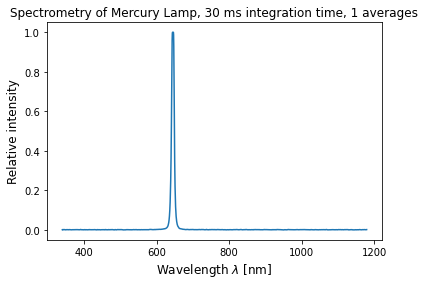

In [ ]:
#@title Get spectra function and find_big_peaks { display-mode: "form" }

def get_spectra(file_name):
    """
    Retrieves data from .SSM files generated by the StellarNet Green-Wave miniature spectrometers.

    Parameters
    ----------
    file_name : str
        Name of the .SMM file containing the spectral data. Do not include the .SSM extension.

    Returns
    -------
    wavelengths : Numpy array (float)
        Array of wavelengths at which data was gathered.
        
    intensity : Numpy array (float)
        Array of intensities corresponding to each wavelength in the "wavelengths" array.
        
    integration_time : int
        Integration (or exposure) time [milliseconds] used to gather the spectrum.
        
    number_of_averages : int
        Number of spectra averaged.

    """
    
    # Get all the data without comments
    data = n.loadtxt(file_name+'.SSM',skiprows=2,dtype = str).T
    
    # Extract wavelengths and intensity data and convert them to floating point values
    wavelengths = data[0].astype(float)
    intensity   = data[1].astype(float)
    
    # Get the comments in the file (which contains the parameters used to take the spectrum)
    comments = n.loadtxt(file_name+'.SSM',delimiter = '\n',dtype = str)[1].split('  ')
    
    # Get the integration time and number of spectra averaged 
    integration_time    = int(comments[4].split(':')[1][:-2])
    number_of_averages  = int(comments[5].split(':')[1])
    
    return wavelengths, intensity, integration_time, number_of_averages

wavelengths, intensity, time, averages = get_spectra('23.4_33.9-reference')

plt.figure()

# Note the largest value possible for the intensity at a given wavelength is 65535 (2**16-1)
plt.plot(wavelengths,intensity/max(intensity))
plt.plot
plt.xlabel('Wavelength $\lambda$ [nm]',size = 12)
plt.ylabel('Relative intensity', size = 12)
plt.title('Spectrometry of Mercury Lamp, %d ms integration time, %d averages'%(time,averages))
plt.rc('font', **font)
plt.show()
scipy.signal.find_peaks(intensity/max(intensity), height=0.8)

def find_big_peak (intensity, wavelength,name):
  peak = scipy.signal.find_peaks(intensity[::], distance = 1, prominence = 2500)
  rel_value = []
  value = []
  for i in range (len(peak[0])):
    rel_value += [intensity[int(peak[0][i])]/max(intensity)]
    value.append(intensity[int(peak[0][i])])
  print('For',name,'run','\n','Max Intensity (count/100μs):',value, 'Relative Max Intensity:', rel_value)  
  return int(wavelength[peak[0]]), value


In [ ]:
#Lets start by finding the peaks of all the data 
#In order to do this we will use the find peaks function

list_of_name_of_files = ['26.7_40.8','28.9_50.4','30.9_','23.4_33.9-reference','32.1_58.1','33.3_53.8','33.6_54.3','35.0_60.0','35.5_60.3','36.6_64.0','37.2_67.0','25.65_'] #removed ,'28.3_', '25.0_36.6'

def find_all_peaks (list_SSM_files):
  '''
  The function extracts the maximum peak for each given file name in the list
  Then it gives all the information to plot ie the wavelengths as the x axis and the relative itensity in the y axis
  '''
  #For each file we need to extract the plots 
  #Specifically we want the wavelengths and intensities
  Big_peaks = []
  dict_SSM = {}
  temp = []

  for file_SSM in list_SSM_files:
    wavelengths_file, intensity_file, time_file, averages_file = get_spectra(file_SSM)
    Big_peak = find_big_peak(intensity_file,wavelengths_file,file_SSM)
    Big_peaks.append(Big_peak)
    temp.append((wavelengths_file,intensity_file))

  for file_SSM,data in zip(list_SSM_files,temp):
    dict_SSM[file_SSM] = data

  return dict_SSM, Big_peaks


dict_runs, peaks = find_all_peaks(list_of_name_of_files)

print('\nThe peaks', [peaks[i][0] for i in range(len(peaks))]) # Dummy code just so function return isnt printed 
z = [peaks[i][1] for i in range(len(peaks))]


For 26.7_40.8 run 
 Max Intensity (count/100μs): [64536.0] Relative Max Intensity: [1.0]
For 28.9_50.4 run 
 Max Intensity (count/100μs): [64451.0] Relative Max Intensity: [1.0]
For 30.9_ run 
 Max Intensity (count/100μs): [62237.0] Relative Max Intensity: [1.0]
For 23.4_33.9-reference run 
 Max Intensity (count/100μs): [64528.0] Relative Max Intensity: [1.0]
For 32.1_58.1 run 
 Max Intensity (count/100μs): [10298.0] Relative Max Intensity: [1.0]
For 33.3_53.8 run 
 Max Intensity (count/100μs): [11195.0] Relative Max Intensity: [1.0]
For 33.6_54.3 run 
 Max Intensity (count/100μs): [14240.0] Relative Max Intensity: [1.0]
For 35.0_60.0 run 
 Max Intensity (count/100μs): [28352.0] Relative Max Intensity: [1.0]
For 35.5_60.3 run 
 Max Intensity (count/100μs): [4406.7] Relative Max Intensity: [1.0]
For 36.6_64.0 run 
 Max Intensity (count/100μs): [17574.0] Relative Max Intensity: [1.0]
For 37.2_67.0 run 
 Max Intensity (count/100μs): [12421.0] Relative Max Intensity: [1.0]
For 25.65_ run 


In [ ]:
int_list = []
for lst in z:
  for element in lst:
    int_list.append(float(element))
print(int_list)


[64536.0, 64451.0, 62237.0, 64528.0, 10298.0, 11195.0, 14240.0, 28352.0, 4406.7, 17574.0, 12421.0, 51569.0]


(625.0, 680.0)

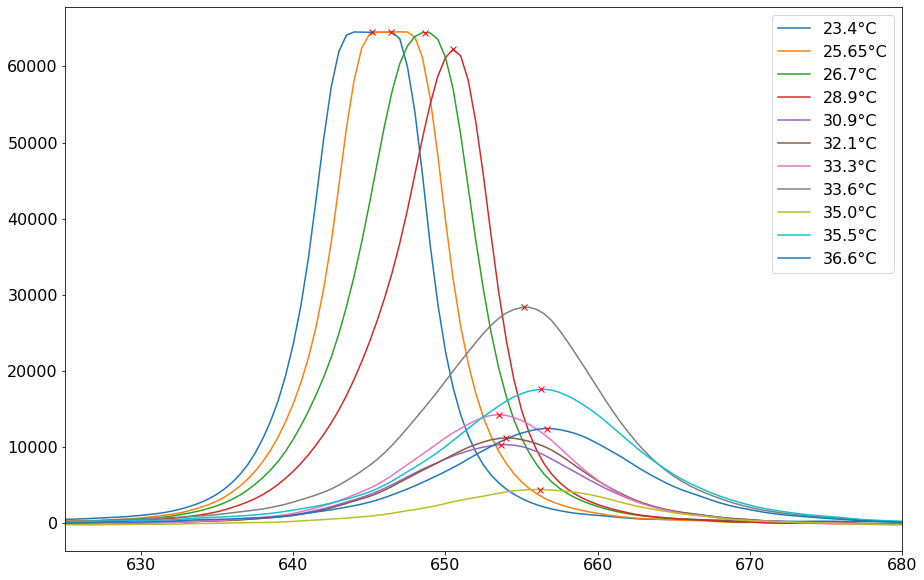

In [221]:
KeysList = [] #names of the files
ItemList = [] #intensities 
for key in dict_runs:
  KeysList.append(key)
  ItemList.append(dict_runs[key])

#Lets use the seperator thing that we used before to find the intensities then rearrange them by temperature 
temps = []
for key in KeysList:
  temp, ambient_temp = key.split('_')
  temps += [float(temp)]
temps.sort()


#Now we need to associate these sorted temps to the list of wavelengths in order to orde those in the same order 
def ordering (temps, KeysList, dict_runs):
  ordered_filenames = []
  ordered_intensities = []
  for temp in temps:
    for filename in KeysList:
      if temp == float(filename[:4]):
        ordered_filenames+= [filename]
        ordered_intensities.append(dict_runs[filename])
  return (ordered_filenames, ordered_intensities)

KeysList, ItemList = ordering(temps, KeysList, dict_runs)



fig, ax = plt.subplots(1, 1, sharex = True, figsize = (15,10))

for i in range(0,len(KeysList)):
  label_temp = str(temps[i]) + '°C'
  if str(KeysList[i]) == '25.65_' or str(KeysList[i]) == '28.3_':
    ax.plot((ItemList)[i][0], n.array(ItemList[i][1])*1.2, label = label_temp)
  else:
    ax.plot(ItemList[i][0],ItemList[i][1], label = label_temp)


'''
For the offset values lets create a dictionary with the values that need to be offset and assume all the others to be 0
The dictionary makes it so that it is clear which file is associated to which offset
'''

offset_dict = {'23.4_33.9-reference':1.2, '35.0_60.0':-0.35, '35.5_60.3':0.2, '36.6_64.0':-0.2, '37.2_67.0':0.2, '25.65_': 1, '28.9_50.4':0.15, '26.7_40.8':-0.6, '32.1_58.1':-0.35}


x_peak_value = []

for i in range(len(KeysList)):
  if KeysList[i] in offset_dict.keys():
    x_peak_value += [ItemList[i][0][scipy.signal.find_peaks(ItemList[i][1], distance = 15, prominence = 2500)[0][0]]+offset_dict[KeysList[i]]]
  else:
    x_peak_value += [ItemList[i][0][scipy.signal.find_peaks(ItemList[i][1], distance = 15, prominence = 2500)[0][0]]]

for i in range(len(KeysList)):
  y_peak_value = ItemList[i][1][scipy.signal.find_peaks(ItemList[i][1], distance = 10, prominence = 2500)[0][0]]
  ax.plot(x_peak_value[i], y_peak_value, 'xr')

ax.legend()
ax.set_xlim(625,680)




In [ ]:
#@title Function that fills between the lines in 3d { display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



def fill_between_3d(ax,x1,y1,z1,x2,y2,z2,mode=1,c='steelblue',alpha=0.6):
    
    """
    
    Function similar to the matplotlib.pyplot.fill_between function but 
    for 3D plots.
       
    input:
        
        ax -> The axis where the function will plot.
        
        x1 -> 1D array. x coordinates of the first line.
        y1 -> 1D array. y coordinates of the first line.
        z1 -> 1D array. z coordinates of the first line.
        
        x2 -> 1D array. x coordinates of the second line.
        y2 -> 1D array. y coordinates of the second line.
        z2 -> 1D array. z coordinates of the second line.
    
    modes:
        mode = 1 -> Fill between the lines using the shortest distance between 
                    both. Makes a lot of single trapezoids in the diagonals 
                    between lines and then adds them into a single collection.
                    
        mode = 2 -> Uses the lines as the edges of one only 3d polygon.
           
    Other parameters (for matplotlib): 
        
        c -> the color of the polygon collection.
        alpha -> transparency of the polygon collection.
        
    """

    if mode == 1:
        
        for i in range(len(x1)-1):
            
            verts = [(x1[i],y1[i],z1[i]), (x1[i+1],y1[i+1],z1[i+1])] + \
                    [(x2[i+1],y2[i+1],z2[i+1]), (x2[i],y2[i],z2[i])]
            
            ax.add_collection3d(Poly3DCollection([verts],
                                                 alpha=alpha,
                                                 linewidths=0,
                                                 color=c))

    if mode == 2:
        
        verts = [(x1[i],y1[i],z1[i]) for i in range(len(x1))] + \
                [(x2[i],y2[i],z2[i]) for i in range(len(x2))]
                
        ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,color=c))

[645.2, 646.4, 648.65, 650.5, 653.65, 654.0, 653.5, 655.15, 656.2, 656.3, 656.7] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


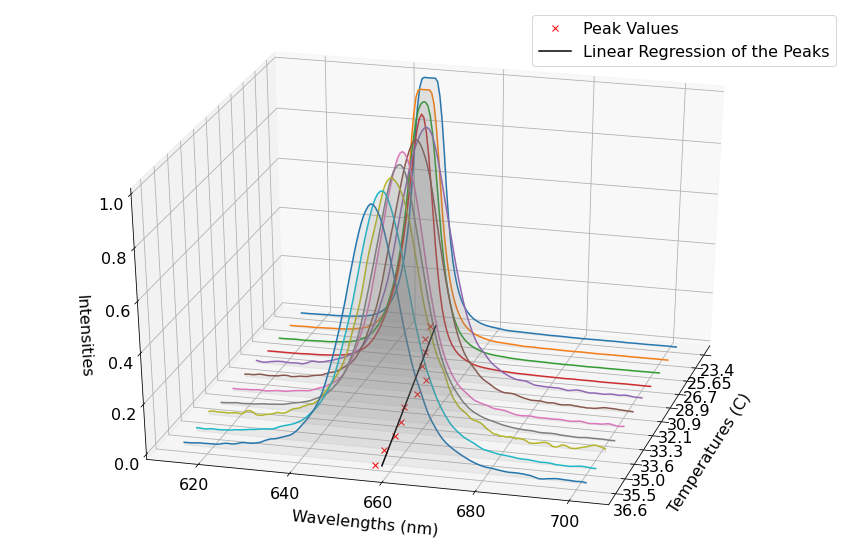

In [225]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # New import

'''
Got rid of the waston by arranging the plotting with the zdir = 'x' command
waston = n.linspace(0,len(ItemList[0][0]),len(ItemList[0][0]))+100000 #Creates a lin space to set the signals on the axis
'''

fig1, ax1 = plt.subplots(1,1,figsize = (15,10))

ax1 = plt.axes(projection = '3d')

index_list = []
for i in range(len(KeysList)):
  #The curve variable makes it so that every curve goes from a min at 0 to a max at 1 --> This improves visibility with tickers
  curve = (ItemList[i][1]+abs(min(ItemList[i][1])))/max(ItemList[i][1]+abs(min(ItemList[i][1])))

  ax1.plot(ItemList[i][0][550:725], curve[550:725], i,zdir = 'x')
  ax1.add_collection3d(plt.fill_between(ItemList[i][0][550:725], curve[550:725], min(curve[550:725]), alpha = 0.05, color = 'grey'), zs = i, zdir = 'x')
  plt.xticks([i], str(i))
  #y_peak_value = ItemList[i][1][scipy.signal.find_peaks(ItemList[i][1], distance = 10, prominence = 2500)[0][0]]
  #ax1.plot([x_peak_value[i]], 0, i, zdir = 'x', marker = 'x', color = 'r') #y value to plot the peaks at the top [y_peak_value/max(ItemList[i][1])]
  index_list += [i]

#plt.rc('font', size=15)
plt.xticks(index_list, temps,) #The ticks are aligned just need to zero everything 

fit_peaks, uncertainty_peaks = linear_regression_simple(index_list, x_peak_value)
ax1.plot(x_peak_value, n.zeros(len(x_peak_value)), index_list, 'xr', label = 'Peak Values', zdir ='x')
ax1.plot(best_fit(n.linspace(0, index_list[-1], 100), fit_peaks), n.zeros(len(n.linspace(0, index_list[-1], 100))), n.linspace(0, index_list[-1], 100),  '-k', label = 'Linear Regression of the Peaks', zdir = 'x')

'''This adds error bars but they are just sized markers and technically they are not the right size --> better to leave for residual plot of the other graph
#Lets add the uncertainties on these measurements
print(uncertainty_peaks[1])#Already the square root
ax1.plot(x_peak_value, n.zeros(len(x_peak_value)), index_list, '_r', label = 'Uncertainty', zdir ='x', markersize = uncertainty_peaks[1]*100)
'''

#Filling between each curve with the color specified --> might need to fit this into the for loops
#Plan is to fill between each specified interval in the y axis
x_y_label_space = [3.2, 1.8]

ax1.set_ylabel('\nWavelengths (nm)', linespacing=x_y_label_space[1])
ax1.set_xlabel('\nTemperatures (C)', linespacing=x_y_label_space[0])
ax1.set_zlabel('\nIntensities', linespacing=1.8)

ax1.legend()


ax1.view_init(30,15)

#Should sort by peak wavelength in order to smoothen out the curve

1680 1680


"This would be for the big plot\n  This part does the fill between thing but I can't manage to make it work properly \n  set1 = [z0,ItemList[i][0], (ItemList[i][1]+abs(min(ItemList[i][1])))/max(ItemList[i][1])]\n  ax1.plot(*set1)\n  if i >0:\n    z0 = n.multiply(n.ones(len(ItemList[i][0]), dtype=int), i)\n    z1 = n.ones(len(ItemList[i-1][0]), dtype=int)\n    z1 = n.multiply(z1, i-1)\n\n    set1 = [z0,ItemList[i][0], (ItemList[i][1]+abs(min(ItemList[i][1])))/max(ItemList[i][1])]\n    set2 = [ z1,ItemList[i-1][0], (ItemList[i-1][1]+abs(min(ItemList[i-1][1])))/max(ItemList[i-1][1])]\n\n  \n    ax1.plot(*set2)\n  fill_between_3d(ax1, *set2, *set1, mode = 1)\n"

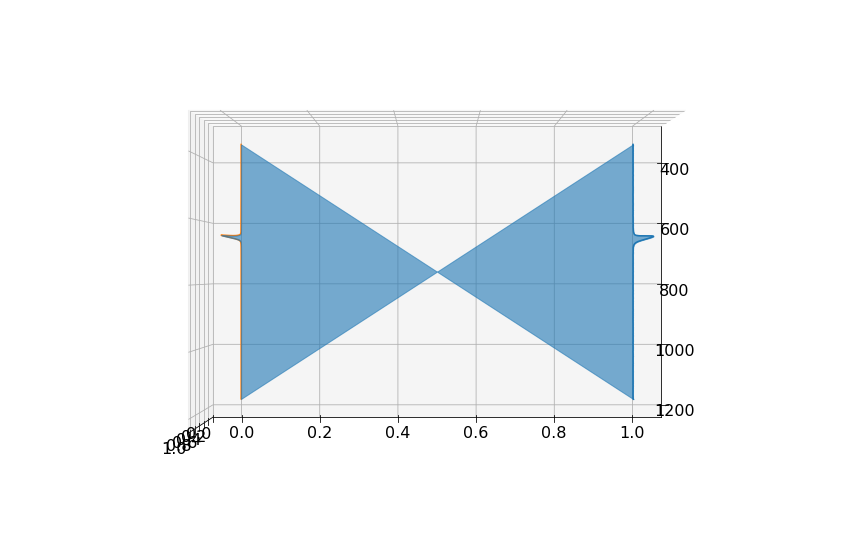

In [ ]:
#@title Thomas testing cell for the big plot { display-mode: "form" }

fig1, ax1 = plt.subplots(1,1,figsize = (15,10))

ax1 = plt.axes(projection = '3d')
curve = 5
'''
ax1.plot(ItemList[curve][0],ItemList[curve][1]/max(ItemList[curve][1]), 0,zdir = 'x')


ax1.add_collection3d(plt.fill_between(ItemList[curve][0], ItemList[curve][1]/max(ItemList[curve][1]), min(ItemList[curve][1]/max(ItemList[curve][1])), alpha = 0.2, color = 'grey'), zs = 0, zdir = 'x')
'''
curve2 = 3
'''
ax1.plot(ItemList[curve2][0],(ItemList[curve2][1]+abs(min(ItemList[curve2][1])))/max(ItemList[curve2][1]), 1,zdir = 'x')
ax1.plot(ItemList[curve2][0],ItemList[curve2][1]/max(ItemList[curve2][1]), 1+0.5,zdir = 'x')
ax1.plot(ItemList[curve2][0],ItemList[curve2][1]/max(ItemList[curve2][1]), 1-0.5,zdir = 'x')

ax1.add_collection3d(plt.fill_between(ItemList[curve2][0], ItemList[curve2][1]/max(ItemList[curve2][1]), min(ItemList[curve2][1]/max(ItemList[curve2][1])), alpha = 0.2, color = 'grey'), zs = 1, zdir = 'x')
'''
z2 = n.ones(len(ItemList[curve2][0]), dtype=int)
z1 = n.zeros(len(ItemList[curve][0]), dtype=int)

set1 = [ItemList[curve][0], z2, (ItemList[curve][1]+abs(min(ItemList[curve][1])))/max(ItemList[curve][1])]
set2 = [ItemList[curve2][0], z1, (ItemList[curve2][1]+abs(min(ItemList[curve2][1])))/max(ItemList[curve2][1])]

ax1.plot(*set1)
ax1.plot(*set2)
fill_between_3d(ax1, *set2, *set1, mode = 2, c = 'C0')
print(len(set1[2]), len(set2[2]))
ax1.view_init(90,0)


'''This would be for the big plot
  This part does the fill between thing but I can't manage to make it work properly 
  set1 = [z0,ItemList[i][0], (ItemList[i][1]+abs(min(ItemList[i][1])))/max(ItemList[i][1])]
  ax1.plot(*set1)
  if i >0:
    z0 = n.multiply(n.ones(len(ItemList[i][0]), dtype=int), i)
    z1 = n.ones(len(ItemList[i-1][0]), dtype=int)
    z1 = n.multiply(z1, i-1)

    set1 = [z0,ItemList[i][0], (ItemList[i][1]+abs(min(ItemList[i][1])))/max(ItemList[i][1])]
    set2 = [ z1,ItemList[i-1][0], (ItemList[i-1][1]+abs(min(ItemList[i-1][1])))/max(ItemList[i-1][1])]

  
    ax1.plot(*set2)
  fill_between_3d(ax1, *set2, *set1, mode = 1)
'''


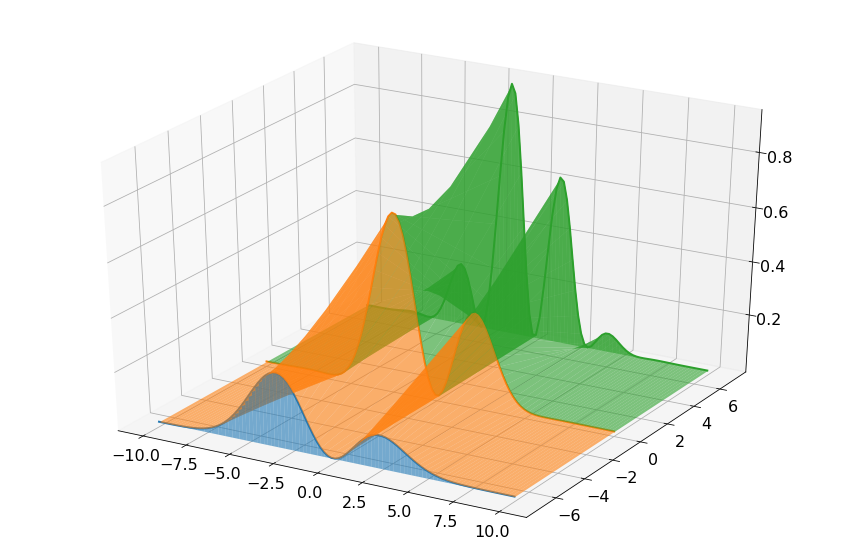

In [ ]:
#@title Cell that has an example of the 3d polygon thing { display-mode: "form" }

#For some reason it seems to work here but not in the main plot which is very confusing
# x axis 1D space.
x = np.linspace(-10,10,100)

# Define the three functions to plot.
f1 = np.sin(0.25*x)**2 * np.exp(-0.1*(x+0.7)**2) 
f2 = np.sin( 0.5*x)**2 * np.exp(-0.1*(x+0.7)**2)
f3 = np.sin(     x)**2 * np.exp(-0.1*(x+0.7)**2)

# Sets of [x, y, 0] lines (with constant y) for defining the bases of the polygons.
set01 = [x, -7*np.ones(len(x)), np.zeros(len(x))]
set02 = [x,  0*np.ones(len(x)), np.zeros(len(x))]
set03 = [x,  7*np.ones(len(x)), np.zeros(len(x))]

# Sets of the form [x, y, fi] (with constant y) representing each function 3D line.
set1  = [x, -7*np.ones(len(x)), f1]
set2  = [x,  0*np.ones(len(x)), f2]
set3  = [x,  7*np.ones(len(x)), f3]

# Plotting part. Figure and axes creation.
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax = plt.axes(projection = '3d')

# Plot the f1 line and its fill_between_3d.
ax.plot(*set1, lw=2, zorder=20, c="C0")
fill_between_3d(ax, *set01, *set1, mode = 1, c="C0")

# Plot the f2 line and its fill_between_3d.
ax.plot(*set2, lw=2, zorder=15, c="C1")
fill_between_3d(ax, *set1, *set2, mode = 1, c="C1")

# Plot the f3 line and its fill_between_3d.
ax.plot(*set3, lw=2, zorder=10, c="C2")
fill_between_3d(ax, *set2, *set3, mode = 1, c="C2")
fill_between_3d(ax, *set03, *set3, mode = 1, c="C2")

# Correct the z limit of the plot.
#ax.set_zlim((0,np.max([f1,f2,f3])))

# Show the plot.
#plt.show()

[0.557710869402208, 634.259269760581] [0.02109628156243451, 0.67225408145628]


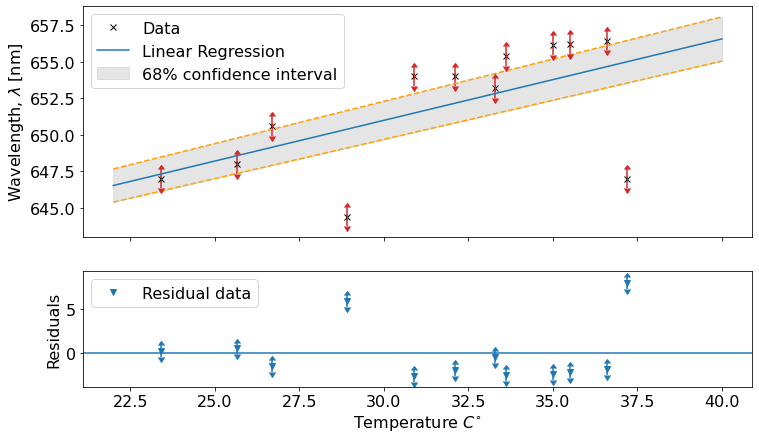

In [222]:
#Now lets find a linear regression for the peaks in terms of the temperature
#Create a list that comprises all the waveleneghts in terms of the temperatures 

'''
Need to readjust the offsets using the dictionary from above 
'''

peaks_regression = []
for pair in peaks:
  peaks_regression += [pair[0]]
peaks_regression = n.array(peaks_regression)+offset[:-2]

fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12,7), gridspec_kw={'height_ratios': [2, 1]})
plt.rc('font', **font)
ax[0].plot(temps, peaks_regression, 'xk', label='Data')

x_values = n.linspace(22, 40, 1000)

#Now we can plot a linear regression through these points by using the lin regression function 
fit_params, uncertainty_params = linear_regression_simple(temps, peaks_regression)

"""
#Using cruve fit
uncertainty_params = [0.0636, 2.02251]
"""
ax[0].plot(x_values, best_fit(x_values, fit_params), label = 'Linear Regression')


'''
Now lets add the confidence intervals and general error bars and residuals to the graph
Note that bft is the bestfit top and bfb is the bestfit bottom
'''

bft_1 = n.array(best_fit(x_values, (fit_params[0]+uncertainty_params[0], fit_params[1]+uncertainty_params[1])))
bfb_1 = n.array(best_fit(x_values, (fit_params[0]-uncertainty_params[0], fit_params[1]-uncertainty_params[1])))



ax[0].plot(x_values, bft_1, '--', color = 'orange')
ax[0].plot(x_values, bfb_1, '--', color = 'orange')
ax[0].fill_between(x_values, bft_1, bfb_1, alpha=0.2, color='gray', label = '68% confidence interval')



#Lets plot the residual data
ax[0].errorbar(temps,peaks_regression, yerr = uncertainty_params[1], fmt = '|',color = 'tab:red', uplims = True, lolims = True)
ax[1].plot(temps, n.array(residuals(best_fit(temps, fit_params), peaks_regression)), 'v', label='Residual data')
ax[1].axhline(y=0)
ax[1].errorbar(temps, n.array(residuals(best_fit(temps, fit_params), peaks_regression)), yerr = uncertainty_params[1], fmt = '|',color = 'tab:blue', uplims = True, lolims = True)
ax[0].set_ylabel(r'Wavelength, $\lambda$ [nm]')
ax[1].set_ylabel(r'Residuals')
ax[1].set_xlabel(r'Temperature $C^{\circ}$')

print(fit_params, uncertainty_params)


ax[0].legend()
ax[1].legend()
plt.savefig('Trend.png')

In [ ]:
#Lets run a Chi-Square fit of the data



In [ ]:
'''
def f(x,a,b):
  return x*a +b

temps = n.array(temps)
peaks_regression = n.array(peaks_regression)
par, cov = opt.curve_fit(f,temps,peaks_regression,p0 = [0,0])
fit = f(temps,*par)

fig, ax = plt.subplots(1,1, figsize = (8,5))
ax.plot(temps,peaks_regression,'k.')
ax.plot(temps, fit, 'k-')

fitA, fitB = par[0],par[1]
errA, errB = n.sqrt(n.diag(cov))[0], n.sqrt(n.diag(cov))[1]

print('fitA:', fitA, '+/-', errA, '\n',
      'fitB:', fitB, '+/-', errB)
'''

"\ndef f(x,a,b):\n  return x*a +b\n\ntemps = n.array(temps)\npeaks_regression = n.array(peaks_regression)\npar, cov = opt.curve_fit(f,temps,peaks_regression,p0 = [0,0])\nfit = f(temps,*par)\n\nfig, ax = plt.subplots(1,1, figsize = (8,5))\nax.plot(temps,peaks_regression,'k.')\nax.plot(temps, fit, 'k-')\n\nfitA, fitB = par[0],par[1]\nerrA, errB = n.sqrt(n.diag(cov))[0], n.sqrt(n.diag(cov))[1]\n\nprint('fitA:', fitA, '+/-', errA, '\n',\n      'fitB:', fitB, '+/-', errB)\n"

In [ ]:
"""
Idea for the next part of data analysis a 3d graph that takes into account all the parameters at once 
"""


'\nIdea for the next part of data analysis a 3d graph that takes into account all the parameters at once \n'

In [ ]:
# def intensity(T,Io,q = 1.60217662e-19,V=2,k=1.38064852e-23):
#   return Io*(n.exp(q*V/k/T)-1)

# sort = sorted(int_list)[::-1]
# guess = [0 for i in range(0,4)]
# par, cov = opt.curve_fit(intensity,temps,sort,p0 = guess)

# yo can I have uh [contour plot]?
# diode broke 
# perfectly understandable have a nice day 
# Bottom Text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


NameError: ignored

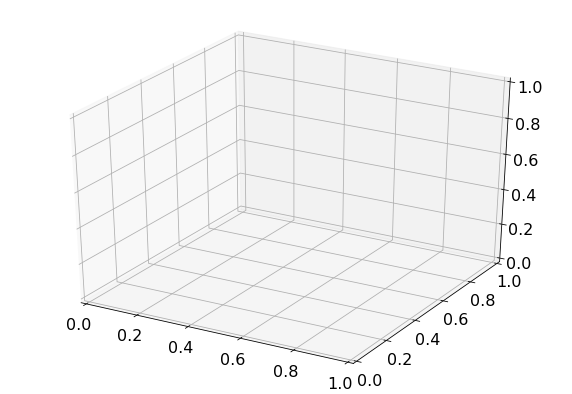

In [223]:
#Wavelength for z axes
#scatter plot for with 3 variables temp wavelngth voltage 


from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot()
x, y =[1, 0], [1,0]
ax.plot(x, y,'-', label = 'Linear Regression for the Run', color = '#1f77b4')
ax.plot(x, y, '.r', label = 'Run 1')
ax.plot(x, y, 'vr', label = 'Run 2')
ax.plot(x, y, '^r', label = 'Run 3')
ax.fill_between(x, x, x, alpha=0.2, color='gray', label = '68% confidence interval')




ax3 = fig.gca(projection = '3d')
c = 299792458
#PLotting the linear regressions
ax3.plot(c/wavelength_1, best_fit(c/wavelength_1, data_1[0]), -1.0, '-', zdir = 'x', color = '#1f77b4', label = 'Linear Regression for the Run')#Linear regression 1
ax3.plot(c/wavelength_2, best_fit(c/wavelength_2, data_2[0]), 0.0, '-', zdir = 'x', color = '#1f77b4')
ax3.plot(c/wavelength_3, best_fit(c/wavelength_3, data_3[0]), 1.0, '-', zdir = 'x', color = '#1f77b4')

#Plotting the data points
ax3.plot(c/wavelength_1, stop_potential_1, -1.0,'.r', zdir = 'x', markersize = 9, label = '40 cm')
ax3.plot(c/wavelength_2, stop_potential_2, 0.0,'vr', zdir = 'x', label = '30 cm')
ax3.plot(c/wavelength_3, stop_potential_3, 1.0,'^r', zdir = 'x', label = '20 cm')

#Creating the upper and lower best fit curves
bft1 = best_fit(c/wavelength_1, data_1[0]+data_1[1])
bfb1 = best_fit(c/wavelength_1, data_1[0]-data_1[1])

bft2 = best_fit(c/wavelength_2, data_2[0]+data_2[1])
bfb2 = best_fit(c/wavelength_2, data_2[0]-data_2[1])

bft3 = best_fit(c/wavelength_3, data_3[0]+data_3[1])
bfb3 = best_fit(c/wavelength_3, data_3[0]-data_3[1])

#PLotting the confidence intervals and the error bars

ax3.plot(c/wavelength_1, bft1, -1,'--', color = 'orange', zdir = 'x')

ax3.plot(c/wavelength_1, bfb1, -1,'--', color = 'orange', zdir = 'x', label = '68% confidence interval')
ax3.legend(loc = 'best')
ax3.add_collection3d(plt.fill_between(c/wavelength_1, bft1, bfb1, alpha = 0.2, color = 'gray', label = '68% confidence interval'), zs = -1, zdir = 'x')
ax3.plot(c/wavelength_1, stop_potential_1, -1,'|', color = '#1f77b4', markersize = data_1[1][1]*200, zdir = 'x')

ax3.plot(c/wavelength_2, bft2, 0,'--', zdir = 'x', color ='orange')
ax3.plot(c/wavelength_2, bfb2, 0, '--', color = 'orange', zdir = 'x')
ax3.add_collection3d(plt.fill_between(c/wavelength_2, bft2, bfb2, alpha = 0.2, color = 'gray', label = '68% confidence interval'), zs = 0, zdir = 'x')
ax3.plot(c/wavelength_2, stop_potential_2, 0,'|', color = '#1f77b4', markersize = data_2[1][1]*200, zdir = 'x')

ax3.plot(c/wavelength_3, bft3, 1, '--', zdir = 'x', color = 'orange')
ax3.plot(c/wavelength_3, bfb3,1, '--',zdir = 'x', color = 'orange')
ax3.add_collection3d(plt.fill_between(c/wavelength_3, bft3, bfb3, alpha = 0.2, color = 'gray', label = '68% confidence interval'), zs = 1, zdir = 'x')
ax3.plot(c/wavelength_3, stop_potential_3, 1,'|', color = '#1f77b4', markersize = data_3[1][1]*200, zdir = 'x')

plt.xticks([-1, 0, 1], '')

ax3.set_ylabel(r'$\frac{c}{wavelength (\lambda)}$', size = 20)
ax3.set_zlabel('Stop potential', size = 15)


In [224]:
# Code for the second laser diode's data

# Retaken Data (wavelength/intensity graph and temperature/wavelength linear best-fit)
retake = ['21.0_retake','22.4_retake','23.0_retake','24.2_retake','27.0_retake','28.9_retake','33.0_retake','38.2_retake','41.5_retake','48.2_retake','48.7_retake','53.8_retake','61.1_retake','34.9_retake_down','30.6_retake_down','29.4_retake_down']
runs, peaks = find_all_peaks(retake)

RetakeKeys = n.array([float(key.split('_')[0]) for key in runs])
RetakeItems = [runs[key] for key in runs]

fig, ax = plt.subplots(1,1,figsize= (15,10))
for i in range(0,len(RetakeItems)):
    # if str(RetakeKeys[i]) != '29.4' and str(RetakeKeys[i]) != '30.6' and str(RetakeKeys[i]) != '34.9': # Exclude the readings we don't want in the waveleng
        ax.plot(RetakeItems[i][0],RetakeItems[i][1]/max(RetakeItems[i][1]),label = RetakeKeys[i])
ax.set_xlim(640,670)
ax.legend()

def f(x,a,b):
    return a*x + b
    
def chi(list,unc):
  list = n.array(list)
  if unc == 0:
    return False
  else:
    return sum(list**2)/unc


peaklist = [peaks[i][0] for i in range(len(peaks))]
par, cov = opt.curve_fit(f,RetakeKeys,peaklist)
unc0, unc1 = n.sqrt(n.diag(cov))
up = f(RetakeKeys,par[0]+unc0, par[1]+unc1)
down = f(RetakeKeys,par[0]-unc0, par[1]-unc1)

fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(RetakeKeys,peaklist,'k.')
ax.plot(RetakeKeys,f(RetakeKeys,*par))
ax.plot(RetakeKeys,up,'k--')
ax.plot(RetakeKeys,down, 'k--')
ax.fill_between(RetakeKeys, up , down, alpha = 0.2, color = 'gray')

res = peaklist-f(RetakeKeys,*par)
print("The Best-Fit value is: %.4f\nThe Chi-square value is %.4f" %(par[0],chi(res,1)))

For 21.0_retake run 
 Max Intensity (count/100μs): [58259.0] Relative Max Intensity: [1.0]
For 22.4_retake run 
 Max Intensity (count/100μs): [41702.0] Relative Max Intensity: [1.0]


OSError: ignored